# 과제3_신용평가모델_비즈니스평가

* 고객사는 ## 은행입니다. 신용평가 업무를 인공지능으로 전환하고자 여러분에게 모델링을 의뢰하였습니다.
* 대출업무는
    * 은행 창구에서 신청을 받고
    * 본사의 심사부서에서는 신용평가를 통해 대출 신청에 대한 승인 여부를 결정해 왔습니다.

* 현장의 요구
    * 경쟁사의 공격적인 대출상품 판매로, 본사에서는 자사 은행의 대출 실적이 줄어들고 있는 것에 부담을 느끼고 있습니다.
    * 그런데, 자사 은행에서는 신용평가 결과의 정확성에 의문을 품고 있으며, 신용평가 기준을 완화하여 가급적 대출승인 범위를 더 확대해 주기를 요구합니다.

* 신용평가 업무를 인공지능으로 전환
    * 현장의 요구를 감안하여, 과거 사람이 하던 평가방식을 개선하고자 인공지능에 의한 예측 모델을 만들고, 정확도를 높이고자 합니다.
-----------------


* 이제 인공지능에 의한 신용평가 시스템은 큰 무리 없이 작동하며 한 달여 운영되어 오고 있습니다. 한 달 동안의 운영 보고서를 작성해야 할 시점입니다.

* 그런데, 인공지능 신용평가 시스템에 대해 처음부터 부정적인 견해를 가져온 고객사 임원이, 심사 기간 단축 말고 구체적으로 **어떤 비즈니스 성과를 가져다 줄 것인지**를 설명해 달라고 요구 해 왔습니다.

* 또 다시 여러분에게 미션이 주어졌습니다. 인공지능 모델을 어떻게 비즈니스 성과로 연결할 수 있을까요?
* 고객사의 과거자료를 검토하며 다음과 같이 대출 수익구조를 정리하게 되었습니다.
    * 제 때 대출이자와 원금을 상환하는 고객으로부터, 평균적으로 대출금의 약 4%(연) 이자 수익이 발생 되었습니다.
    * 제 때 상환하지 않는 고객으로 인해, 평균적으로 약 9%의 원금 손실(연)이 발생됩니다.
    * 평균 대출 금액은 약 3200달러, 평균 대출 기간은 2년 입니다.



## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

### 2) 데이터 로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_all.csv'
data = pd.read_csv(path)
data.loc[data['Payment'] == 4, 'Payment'] = 3
data.head()

,Creditability,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuableAsset,Age,Apartment,CreditCount,Occupation,Dependents,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28,2,1,3,1,1,1
1,1,2,9,2,0,276,3,4,4,1,22,1,1,2,1,1,1
2,1,1,18,3,2,1049,2,2,4,2,21,1,1,3,1,1,1
3,1,1,24,3,1,6419,5,2,4,4,44,3,2,4,2,2,1
4,1,3,12,2,2,1424,5,2,4,1,55,2,1,4,1,2,1


|	칼럼명	|	설명	|	 	|	값 의미	|
|	-----	|	-----	|	-----	|	-----	|
|	Creditability	|	Creditability(Target)	|	향후 신용도	|	0 : Bad, 1 : Good	|
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	CreditDuration	|	Duration of Credit (month)	|	신청한 대출기간(월)	|	숫자	|
|	Payment	|	Payment Status of Previous Credit	|	과거 대출 납입 상태	|	0 : 연체, 1 : 기타신용, 2 : 완납, 3 : 정상 대출상환 중 |
|	Purpose	|	Purpose	|	신청한 대출목적	|	1 : New Car , 2 : Used Car , 3 : Furniture , 4 : TV , 5 : Appliances , 6 : Repair , 8 : Vacation , 9 :Retraining , 10 : Business , 0 : Other	|
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|		|
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed,  2: <1 Year,  3: [1, 4),  4: [4, 7),  5: Above 7	|
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|	MostValuable	|	Most valuable available asset	|	가장 가치있는 자산	|	1: None , 2: Car , 3: Life Insurance , 4: Real Estate	|
|	Age	|	Age (years)	|	나이	|		|
|	AppartmentType	|	Type of apartment	|	주거환경	|	1: free apartment, 2: Rented, 3: Owned	|
|	NoCredits	|	No of Credits at this Bank	|	현재 총 대출 건수	|	1 : one, 2 : 2 ~ 3, 3 : 4 ~ 5, 4 : 6 ~	|
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|
|	Telephone	|	Telephone	|	전화기 소유 여부	|	2: Yes , 1: No	|
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	2: Yes , 1: No	|


In [3]:
data['CreditAmount'].mean()

3271.248


* 데이터의 크기를 살펴봅시다.

In [4]:
data.shape

(1000, 17)

* Target 변수 조회

Creditability
1    700
0    300
Name: count, dtype: int64
Creditability
1    0.7
0    0.3
Name: proportion, dtype: float64


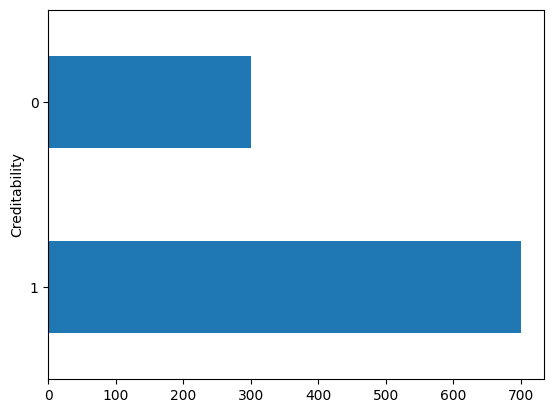

In [5]:
print(data['Creditability'].value_counts())
print(data['Creditability'].value_counts(normalize = True))

data['Creditability'].value_counts().plot(kind = 'barh')
plt.show()

## 2.데이터 준비


### 1) x, y로 나누기

In [6]:
target = 'Creditability'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

### 2) 가변수화

In [7]:
dummy_vars = ['SexMarital', 'MostValuableAsset','ForeignWorker','Telephone']

x = pd.get_dummies(x, columns = dummy_vars, drop_first = True)
x.head()

,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,CurrentAddress,Age,Apartment,CreditCount,Occupation,Dependents,SexMarital_2,SexMarital_3,SexMarital_4,MostValuableAsset_2,MostValuableAsset_3,MostValuableAsset_4,ForeignWorker_2,Telephone_2
0,3,24,2,0,1249,2,2,28,2,1,3,1,False,False,True,False,False,False,False,False
1,2,9,2,0,276,3,4,22,1,1,2,1,False,False,True,False,False,False,False,False
2,1,18,3,2,1049,2,4,21,1,1,3,1,True,False,False,True,False,False,False,False
3,1,24,3,1,6419,5,4,44,3,2,4,2,True,False,False,False,False,True,False,True
4,3,12,2,2,1424,5,4,55,2,1,4,1,True,False,False,False,False,False,False,True


### 3) train : validation 분할

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 20)

In [10]:
x_train.shape

(800, 20)

## 3.모델링

In [11]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

### 1) 학습

In [12]:
# 기본값으로 모델링
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### 2) 예측 및 평가
* validation set으로 예측하고 평가하시오.

In [13]:
pred1 = model.predict(x_val)

In [14]:
print(confusion_matrix(y_val, pred1))
print(classification_report(y_val, pred1))

[[ 27  44]
 [ 14 115]]
              precision    recall  f1-score   support

           0       0.66      0.38      0.48        71
           1       0.72      0.89      0.80       129

    accuracy                           0.71       200
   macro avg       0.69      0.64      0.64       200
weighted avg       0.70      0.71      0.69       200



In [15]:
cm1 = confusion_matrix(y_val, pred1)

## 4.비즈니스 기대가치 평가

* 비즈니스 가치 matrix

In [16]:
bv = np.array([[0, -0.18],[0, 0.08]])
bv

array([[ 0.  , -0.18],
       [ 0.  ,  0.08]])

* 모델의 성적표 (Confusion matrix)

In [17]:
cm_p = cm1 / np.sum(cm1)

In [18]:
cm_p

array([[0.135, 0.22 ],
       [0.07 , 0.575]])

* 기대가치 계산하기

In [19]:
np.sum(cm_p * bv) * 3200

20.48000000000001

## 5.실습 : 모델 개선하기

* 위에서 만든 모델보다 좀더 나은 모델을 만들어 봅시다.
* 다양한 모델을 만들어 봅시다. (최소 2개 이상)
    * 여러 알고리즘
    * 하이퍼파라미터 튜닝(GridSearchCV, RandomizedSearchCV)

* RandomForest 튜닝

In [20]:
param = {'max_depth':range(2,10), 'n_estimators':range(50,201,50)}
model2 = GridSearchCV(RandomForestClassifier(), param, cv = 5)

model2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 10),
                         'n_estimators': range(50, 201, 50)})

In [21]:
# 튜닝 결과
model2.best_params_, model2.best_score_

({'max_depth': 7, 'n_estimators': 200}, 0.7537499999999999)

In [22]:
# 예측 결과 및 평가
pred2 = model2.predict(x_val)
cm2 = confusion_matrix(y_val, pred2)

In [23]:
# 비즈니스 기대가치 계산하기
np.sum(cm2/np.sum(cm2) * bv) * 3200

4.479999999999995

* 개선된 모델과 이전 모델에 대해서 다음의 항목으로 평가하시오.
    * ML Metric : Accuracy
    * Business Metric : 예상 수익
* 산출된 결과에 대한 여러분의 의견을 작성해주세요.

In [24]:
# classification_report
print(classification_report(y_val, pred1))
print('-'*50)
print(classification_report(y_val, pred2))

              precision    recall  f1-score   support

           0       0.66      0.38      0.48        71
           1       0.72      0.89      0.80       129

    accuracy                           0.71       200
   macro avg       0.69      0.64      0.64       200
weighted avg       0.70      0.71      0.69       200

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.24      0.37        71
           1       0.70      0.97      0.81       129

    accuracy                           0.71       200
   macro avg       0.75      0.60      0.59       200
weighted avg       0.74      0.71      0.65       200



* 기대가치 비교하기

In [25]:
biz_value1 = np.sum(cm1/np.sum(cm1) * bv) * 3200
biz_value2 = np.sum(cm2/np.sum(cm2) * bv) * 3200
print(f'model1 : $ {round(biz_value1,2)}')
print(f'model2 : $ {round(biz_value2,2)}')

model1 : $ 20.48
model2 : $ 4.48
